In [282]:
#In this lab, you will be using the Sakila database of movie rentals.

#In order to optimize our inventory, we would like to predict if a film will have more monthly rentals in July than in June. 
# Create a model to predict it.

In [283]:
# 1. Create a query or queries to extract the information you think may be relevant for building the prediction model. 
# It should include some film features and some rental features. Use the data from 2005.

import pymysql 
from sqlalchemy import create_engine
import pandas as pd
import datetime
import getpass  
password = getpass.getpass()

········


In [284]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''select f.film_id, f.title, f.release_year, f.language_id, f.rental_duration, f.rental_rate, f.length, f.rating, i.store_id, r.rental_id, r.rental_date, r.customer_id, r.staff_id, fc.category_id, fa.actor_id 
from film f
join film_actor fa
on f.film_id = fa.film_id
join film_category fc
on f.film_id = fc.film_id
join inventory i
on f.film_id = i.film_id
join rental r
on i.inventory_id = r.inventory_id 
where rental_date between '2005-01-01' and '2005-12-31';'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,rating,store_id,rental_id,rental_date,customer_id,staff_id,category_id,actor_id
0,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,5
1,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,27
2,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,37
3,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,43
4,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,84


In [285]:
data.shape

(86981, 15)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86981 entries, 0 to 86980
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   film_id          86981 non-null  int64         
 1   title            86981 non-null  object        
 2   release_year     86981 non-null  int64         
 3   language_id      86981 non-null  int64         
 4   rental_duration  86981 non-null  int64         
 5   rental_rate      86981 non-null  float64       
 6   length           86981 non-null  int64         
 7   rating           86981 non-null  object        
 8   store_id         86981 non-null  int64         
 9   rental_id        86981 non-null  int64         
 10  rental_date      86981 non-null  datetime64[ns]
 11  customer_id      86981 non-null  int64         
 12  staff_id         86981 non-null  int64         
 13  category_id      86981 non-null  int64         
 14  actor_id         86981 non-null  int64

In [287]:
data.isna().sum()

film_id            0
title              0
release_year       0
language_id        0
rental_duration    0
rental_rate        0
length             0
rating             0
store_id           0
rental_id          0
rental_date        0
customer_id        0
staff_id           0
category_id        0
actor_id           0
dtype: int64

In [288]:
# let's add a column with the month of rental to ease the following of the lab !
data['rental_month'] = data['rental_date'].dt.month
data.head()

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,rating,store_id,rental_id,rental_date,customer_id,staff_id,category_id,actor_id,rental_month
0,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,5,8
1,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,27,8
2,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,37,8
3,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,43,8
4,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,84,8


In [289]:
# 2. Create a query to get the total amount of rentals in June for each film.
# WITH SQL QUERY
query = '''select f.title, count(r.rental_id) as nb_rental
from film f
join inventory i
on f.film_id = i.film_id
join rental r
on i.inventory_id = r.inventory_id 
where rental_date between '2005-06-01' and '2005-06-30'
group by f.title'''

data_rental_june = pd.read_sql_query(query, engine)
data_rental_june.head()

,title,nb_rental
0,GIANT TROOPERS,4
1,WASH HEAVENLY,5
2,NAME DETECTIVE,4
3,GOODFELLAS SALUTE,5
4,DEER VIRGINIAN,4


In [290]:
data_rental_june.shape

(900, 2)

In [291]:
# WITH PANDAS
# first we create the june dataframe :
data_june = data[data['rental_month'] == 6]
data_june

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,rating,store_id,rental_id,rental_date,customer_id,staff_id,category_id,actor_id,rental_month
12,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,3150,2005-06-20 20:35:28,34,1,1,5,6
13,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,3150,2005-06-20 20:35:28,34,1,1,27,6
14,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,3150,2005-06-20 20:35:28,34,1,1,37,6
15,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,3150,2005-06-20 20:35:28,34,1,1,43,6
16,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,3150,2005-06-20 20:35:28,34,1,1,84,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86961,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,1292,2005-06-15 09:03:52,178,1,16,37,6
86962,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,1292,2005-06-15 09:03:52,178,1,16,94,6
86963,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,1292,2005-06-15 09:03:52,178,1,16,138,6
86964,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,1292,2005-06-15 09:03:52,178,1,16,151,6


In [292]:
data_rental_june = data_june.groupby(['film_id']).agg({'rental_id': pd.Series.nunique}).reset_index().rename(columns = {'rental_id' : 'nb_rental_june'})
data_rental_june

,film_id,nb_rental_june
0,1,3
1,3,1
2,4,2
3,5,2
4,6,3
...,...,...
892,996,1
893,997,1
894,998,2
895,999,2


In [293]:
# 3. Do the same with July.
data_july = data[data['rental_month'] == 7]
data_july

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,rating,store_id,rental_id,rental_date,customer_id,staff_id,category_id,actor_id,rental_month
18,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,5072,2005-07-09 05:01:58,254,2,1,5,7
19,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,5072,2005-07-09 05:01:58,254,2,1,27,7
20,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,5072,2005-07-09 05:01:58,254,2,1,37,7
21,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,5072,2005-07-09 05:01:58,254,2,1,43,7
22,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,5072,2005-07-09 05:01:58,254,2,1,84,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86971,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,8871,2005-07-30 00:12:41,382,1,16,37,7
86972,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,8871,2005-07-30 00:12:41,382,1,16,94,7
86973,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,8871,2005-07-30 00:12:41,382,1,16,138,7
86974,989,WORKING MICROCOSMOS,2006,1,4,4.99,74,R,2,8871,2005-07-30 00:12:41,382,1,16,151,7


In [294]:
data_rental_july = data_july.groupby(['film_id']).agg({'rental_id': pd.Series.nunique}).reset_index().rename(columns = {'rental_id' : 'nb_rental_july'})
data_rental_july

,film_id,nb_rental_july
0,1,9
1,2,2
2,3,4
3,4,12
4,5,5
...,...,...
950,996,3
951,997,2
952,998,3
953,999,7


In [295]:
# 4. Create a new column containing (Yes/No) for each film whether or not the number of monthly rentals in July was bigger than in June. 
# Your objective will be to predict this new column.

# first let's merge the dataframe to get the info of rentals for each movie

data_jj = pd.merge(left = data_rental_july, 
                                 right = data_rental_june, 
                                 how = 'left', 
                                 left_on = "film_id", 
                                 right_on= "film_id") 
display(data_jj.shape)
data_jj.head(30)

(955, 3)

,film_id,nb_rental_july,nb_rental_june
0,1,9,3.0
1,2,2,NaN
2,3,4,1.0
3,4,12,2.0
4,5,5,2.0
5,6,7,3.0
6,7,6,2.0
7,8,7,3.0
8,9,7,NaN
9,10,8,4.0


In [296]:
data_jj['nb_rental_june'] = data_jj['nb_rental_june'].fillna(0)
data_jj['nb_rental_june']

0      3.0
1      0.0
2      1.0
3      2.0
4      2.0
      ... 
950    1.0
951    1.0
952    2.0
953    2.0
954    5.0
Name: nb_rental_june, Length: 955, dtype: float64

In [297]:
data_jj['nb_rental_june'].isna().sum()

0

In [298]:
# And then create the Yes/No column :

new_col = []
for i in range(len(data_jj)) :
    if data_jj['nb_rental_june'][i] < data_jj['nb_rental_july'][i] :
        new_col.append('Yes')
    elif data_jj['nb_rental_june'][i] >= data_jj['nb_rental_july'][i] :
        new_col.append('No')
    else : 
        new_col.append('Same')

In [299]:
data_jj['pred_july'] = new_col
data_jj['pred_july'].value_counts()

Yes    949
No       6
Name: pred_july, dtype: int64

In [300]:
# 5. Read the data into a Pandas dataframe.

data_detail = pd.merge(left = data, 
                                 right = data_jj, 
                                 how = 'left', 
                                 left_on = "film_id", 
                                 right_on= "film_id") 
display(data_detail.shape)
data_detail.head()

(86981, 19)

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,rating,store_id,rental_id,rental_date,customer_id,staff_id,category_id,actor_id,rental_month,nb_rental_july,nb_rental_june,pred_july
0,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,5,8,8,4.0,Yes
1,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,27,8,8,4.0,Yes
2,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,37,8,8,4.0,Yes
3,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,43,8,8,4.0,Yes
4,19,AMADEUS HOLY,2006,1,6,0.99,113,PG,1,10895,2005-08-02 01:16:59,77,2,1,84,8,8,4.0,Yes


In [301]:
data_detail.isna().sum()

film_id            0
title              0
release_year       0
language_id        0
rental_duration    0
rental_rate        0
length             0
rating             0
store_id           0
rental_id          0
rental_date        0
customer_id        0
staff_id           0
category_id        0
actor_id           0
rental_month       0
nb_rental_july     0
nb_rental_june     0
pred_july          0
dtype: int64

In [302]:
# 6. Analyze extracted features and transform them. 

# You may need to encode some categorical variables or scale numerical variables.


In [303]:
data_detail.dtypes

film_id                     int64
title                      object
release_year                int64
language_id                 int64
rental_duration             int64
rental_rate               float64
length                      int64
rating                     object
store_id                    int64
rental_id                   int64
rental_date        datetime64[ns]
customer_id                 int64
staff_id                    int64
category_id                 int64
actor_id                    int64
rental_month                int64
nb_rental_july              int64
nb_rental_june            float64
pred_july                  object
dtype: object

In [304]:
data_detail['release_year'].value_counts()

2006    86981
Name: release_year, dtype: int64

In [305]:
data_detail['language_id'].value_counts()

1    86981
Name: language_id, dtype: int64

In [306]:
data_detail['rental_duration'].value_counts()

6    19052
4    18450
3    17938
5    17358
7    14183
Name: rental_duration, dtype: int64

In [307]:
data_detail['rental_rate'].value_counts()

0.99    30756
2.99    28626
4.99    27599
Name: rental_rate, dtype: int64

In [308]:
data_detail['rating'].value_counts()

PG-13    18850
PG       18421
NC-17    17388
R        17053
G        15269
Name: rating, dtype: int64

In [309]:
data_detail['store_id'].value_counts()

2    44230
1    42751
Name: store_id, dtype: int64

In [310]:
data_detail['staff_id'].value_counts()

1    43784
2    43197
Name: staff_id, dtype: int64

In [311]:
data_detail['category_id'].value_counts()

15    6861
2     6479
1     6204
6     6149
7     5886
14    5695
8     5544
9     5516
3     5473
13    5131
4     5043
11    4849
5     4621
16    4601
10    4490
12    4439
Name: category_id, dtype: int64

In [312]:
data_detail['rental_month'].value_counts()

7    36821
8    31220
6    12667
5     6273
Name: rental_month, dtype: int64

In [313]:
# let's drop the following columns :
# film_id, title, rental_id, rental_date (no point to keep them for our model) 
# release_year (only one value)
# language_id (same reason)
# nb_rental_july + nb_rental_june

In [314]:
data_detail = data_detail[['rental_duration', 'rental_rate', 'length', 'rating', 'store_id', 'customer_id', 'staff_id', 'category_id', 'actor_id', 'rental_month', 'pred_july']]
data_detail

,rental_duration,rental_rate,length,rating,store_id,customer_id,staff_id,category_id,actor_id,rental_month,pred_july
0,6,0.99,113,PG,1,77,2,1,5,8,Yes
1,6,0.99,113,PG,1,77,2,1,27,8,Yes
2,6,0.99,113,PG,1,77,2,1,37,8,Yes
3,6,0.99,113,PG,1,77,2,1,43,8,Yes
4,6,0.99,113,PG,1,77,2,1,84,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...
86976,4,4.99,74,R,2,385,2,16,37,8,Yes
86977,4,4.99,74,R,2,385,2,16,94,8,Yes
86978,4,4.99,74,R,2,385,2,16,138,8,Yes
86979,4,4.99,74,R,2,385,2,16,151,8,Yes


In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

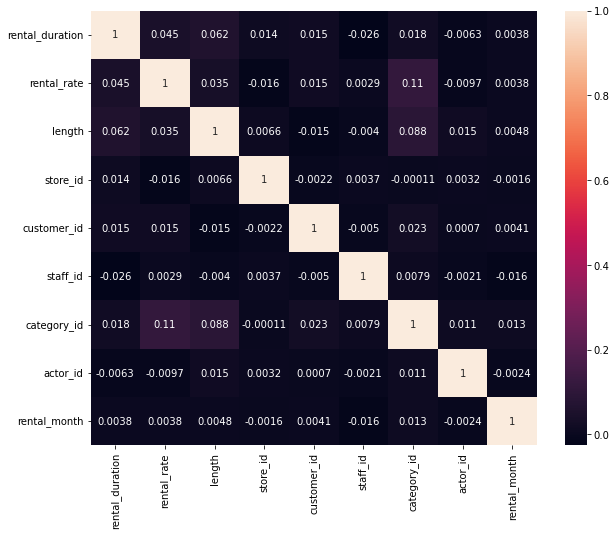

In [316]:
corr_matrix=data_detail.corr()  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

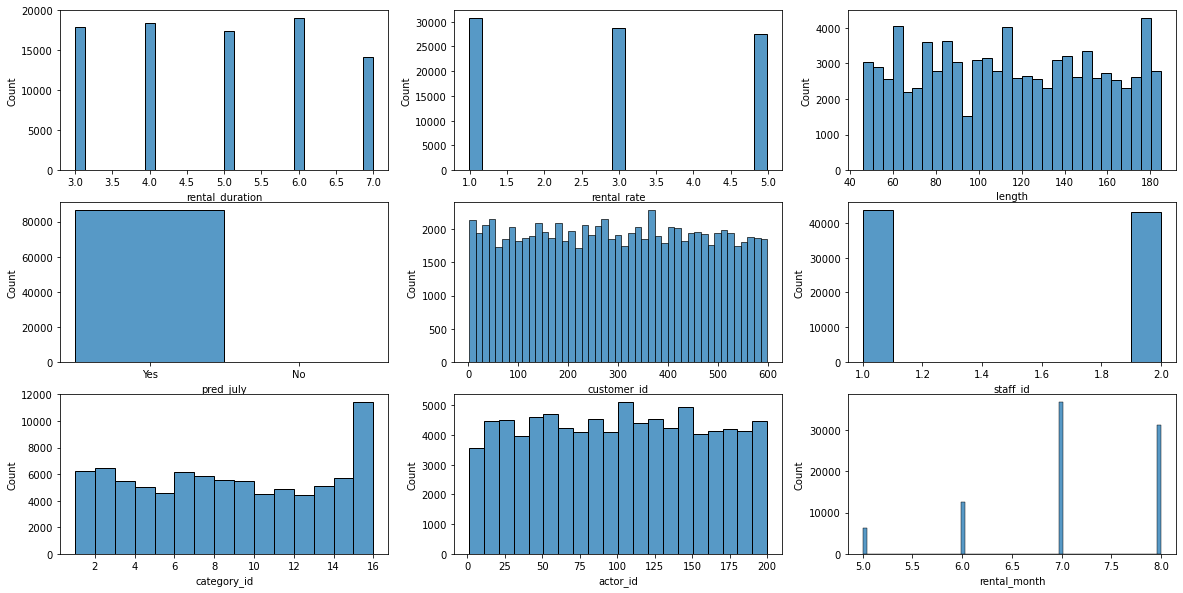

In [317]:
fig, ax = plt.subplots(3,3,figsize=(20,10))  
sns.histplot(x='rental_duration', data=data_detail, bins = 30, ax=ax[0,0])   
sns.histplot(x='rental_rate', data=data_detail, ax=ax[0,1])            
sns.histplot(x='length', data = data_detail, bins=30, ax = ax[0,2]) 
sns.histplot(x='pred_july', data = data_detail, ax = ax[1,0]) 
sns.histplot(x='customer_id', data=data_detail, ax=ax[1,1])   
sns.histplot(x='staff_id', data=data_detail, bins = 10, ax=ax[1,2])            
sns.histplot(x='category_id', data = data_detail, bins = 15, ax = ax[2,0]) 
sns.histplot(x='actor_id', data = data_detail, bins = 20, ax = ax[2,1]) 
sns.histplot(x='rental_month', data = data_detail, ax = ax[2,2]) 
plt.show()

In [318]:
# We see neither high correlation btw numerical values, nor normal distributions
# let's split X/y to transform them and try to get better correlations

y = data_detail[['pred_july']]  # the variable I want to predict
X = data_detail.drop('pred_july', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)

In [319]:
# let's split btw categorical and numerical datatypes

import numpy as np

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = np.object)
X_test_cat = X_test.select_dtypes(include = np.object)

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_45036/3979413353.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include = np.object)
/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_45036/3979413353.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)


In [320]:
X_train_cat

,rating
72467,PG
4878,G
7588,G
7610,G
46515,PG
...,...
67606,PG
26808,PG
74187,PG-13
21691,PG-13


In [321]:
# let's encode categorical data first, with OneHotEncoder!

from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder()

encoder1.fit(X_train_cat)

print(encoder1.get_feature_names_out())

encoded_train = encoder1.transform(X_train_cat).toarray()

X_onehot_encoded_train = pd.DataFrame(encoded_train,columns=encoder1.get_feature_names_out())
X_onehot_encoded_train.head(10)

['rating_G' 'rating_NC-17' 'rating_PG' 'rating_PG-13' 'rating_R']


,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0


In [322]:
# let's encode our y which is categorical (binary - Yes or No)

from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder()

encoder2.fit(y_train)

print(encoder2.get_feature_names_out())

encoded_train2 = encoder2.transform(y_train).toarray()

y_onehot_encoded_train = pd.DataFrame(encoded_train2,columns=encoder2.get_feature_names_out())
y_onehot_encoded_train.head(10)

['pred_july_No' 'pred_july_Yes']


,pred_july_No,pred_july_Yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [323]:
# Now we can concatenate our numerical and categorical values
#X_train = 
X_train_encoded = np.concatenate([X_onehot_encoded_train, X_train_num], axis=1)
X_train_encoded

array([[  0.,   0.,   1., ...,  14., 107.,   7.],
       [  1.,   0.,   0., ...,   1., 142.,   7.],
       [  1.,   0.,   0., ...,   2., 107.,   7.],
       ...,
       [  0.,   0.,   0., ...,  14., 113.,   8.],
       [  0.,   0.,   0., ...,   4.,  64.,   8.],
       [  0.,   1.,   0., ...,  11.,  40.,   6.]])

In [337]:
y_train = y_onehot_encoded_train['pred_july_Yes']

In [325]:
# now let's scale our data with a transformer : 
# As my distributions are far from being normal, I'll try to use powertransformer (I hesitated with Box-Cox and Standard)

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train_encoded)

print(pt.get_feature_names_out())
print(pt.lambdas_)

pt_transformed = pt.transform(X_train_encoded)

X_train_transfo = pd.DataFrame(pt_transformed,columns=pt.get_feature_names_out())
X_train_transfo.head()


['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13']
[-8.05444784 -6.94465274 -6.42085909 -6.25924173 -7.13823733  0.59067917
  0.43915928  0.70731823  0.23013276  0.71142788 -0.10420704  0.67435296
  0.72781872  4.01734384]


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,-0.461112,-0.499308,1.922887,-0.526847,-0.49211,-0.634109,1.202009,-1.525049,-1.015672,1.141937,1.007067,1.159174,0.189330,-0.254615
1,2.168672,-0.499308,-0.520051,-0.526847,-0.49211,0.107800,-1.227742,-1.645974,0.984569,0.850629,1.007067,-1.736956,0.742410,-0.254615
2,2.168672,-0.499308,-0.520051,-0.526847,-0.49211,0.107800,1.202009,0.217681,-1.015672,0.165724,-0.992983,-1.421975,0.189330,-0.254615
3,2.168672,-0.499308,-0.520051,-0.526847,-0.49211,0.107800,1.202009,0.217681,-1.015672,-0.729652,1.007067,-1.421975,0.757629,-1.237026
4,-0.461112,-0.499308,1.922887,-0.526847,-0.49211,1.453732,1.202009,0.193768,-1.015672,1.019087,1.007067,0.226700,-0.148546,1.177166


In [326]:
# Let's apply the transfo to the test set now

In [327]:
X_test_cat = X_test.select_dtypes(include = np.object)
X_test_num = X_test.select_dtypes(include = np.number)

X_test_cat

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_45036/3873720348.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)


,rating
4436,G
78060,PG
52593,R
63526,NC-17
3386,G
...,...
58659,G
73605,NC-17
62259,NC-17
86039,R


In [329]:
encoded_test = encoder1.transform(X_test_cat).toarray()

X_onehot_encoded_test = pd.DataFrame(encoded_test,columns=encoder1.get_feature_names_out())
X_onehot_encoded_test.head(10)

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0


In [330]:
encoded_test2 = encoder2.transform(y_test).toarray()

y_onehot_encoded_test = pd.DataFrame(encoded_test2,columns=encoder2.get_feature_names_out())
y_onehot_encoded_test.head(10)

,pred_july_No,pred_july_Yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [331]:
X_test_encoded = np.concatenate([X_onehot_encoded_test, X_test_num], axis=1)
X_test_encoded

array([[  1.,   0.,   0., ...,   1.,  50.,   7.],
       [  0.,   0.,   1., ...,  15., 138.,   6.],
       [  0.,   0.,   0., ...,  10.,  67.,   7.],
       ...,
       [  0.,   1.,   0., ...,  12., 191.,   8.],
       [  0.,   0.,   0., ...,  16., 171.,   6.],
       [  0.,   0.,   1., ...,   6.,   1.,   5.]])

In [338]:
y_test = y_onehot_encoded_test['pred_july_Yes']

In [333]:
pt_transformed = pt.transform(X_test_encoded)

X_test_transfo = pd.DataFrame(pt_transformed,columns=pt.get_feature_names_out())
X_test_transfo.head()


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,2.168672,-0.499308,-0.520051,-0.526847,-0.492110,0.107800,-1.227742,-1.465523,-1.015672,0.198014,-0.992983,-1.736956,-0.837372,-0.254615
1,-0.461112,-0.499308,1.922887,-0.526847,-0.492110,0.107800,1.202009,0.866102,-1.015672,-1.587694,1.007067,1.332558,0.681242,-1.237026
2,-0.461112,-0.499308,-0.520051,-0.526847,2.032066,-0.634109,1.202009,-1.148013,-1.015672,-1.009472,-0.992983,0.423547,-0.508206,-0.254615
3,-0.461112,2.002771,-0.520051,-0.526847,-0.492110,1.453732,-1.227742,-0.817899,-1.015672,-0.379167,-0.992983,0.800615,0.056417,1.177166
4,2.168672,-0.499308,-0.520051,-0.526847,-0.492110,-1.439850,0.167034,-1.645974,-1.015672,0.341203,1.007067,-1.736956,-0.857594,1.177166


In [339]:
# 7. Create a logistic regression model to predict this new column from the cleaned data.

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transfo, y_train)

In [340]:
predictions = classification.predict(X_test_transfo)
classification.score(X_test_transfo, y_test)

0.9969534977294936

In [342]:
# 8. Evaluate the results.

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[    0,    53],
       [    0, 17344]])

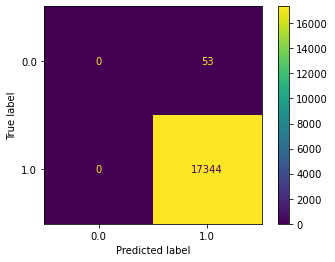

In [343]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(cm_test, display_labels = classification.classes_)
disp.plot()
plt.show()

In [ ]:
# this matrix can be explained with the imbalance of our y (99% of Yes in our dataset)
# The true "No" are not predicted in our model, big weakness ! There 53 'No' that our model transformed into a Yes 